In [1]:
import pandas as pd
import ECMOrl as rl
import plot_ECMO
import WIS as wis

In [2]:
cluster_num = 50
num_models = 500

In [3]:
merge_data = pd.read_csv("../can to decan data/merge_data_train.csv")
data_clustered = pd.read_csv("../can to decan data/ECMO_data_clustered_train.csv")
unique_action_space = pd.read_csv('../can to decan data/unique_action_space.csv')

model_num=86
merged_test = pd.read_csv("../can to decan data/merge_data_test.csv")
clustered_test = pd.read_csv("../can to decan data/ECMO_data_clustered_test.csv")
ori_AS = pd.read_csv("../can to decan data/non_discritised_data.csv")

### Train Models

In [ ]:
parallel_q_learning(data_clustered, merge_data, cluster_num, unique_action_space, num_models)

### Evaluated Trained Models on testing dataset

In [4]:
best_model_num, lower_upper_bonds_avg, medians_avg, maxs_avg = wis.wis_all_models(clustered_test, merged_test, num_models)


100%|██████████| 500/500 [16:57<00:00,  2.03s/it]


The model with maximum reward is Model 22


NameError: name 'calculate_clinician_reward' is not defined

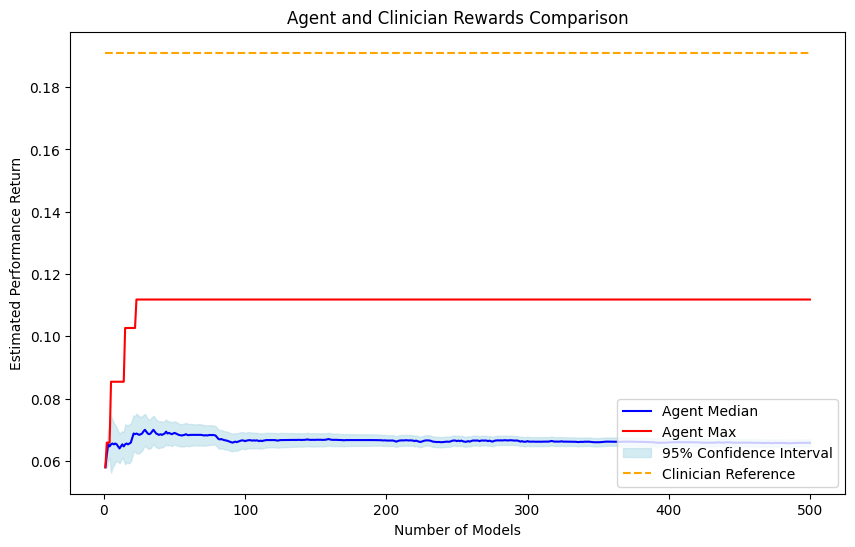

In [5]:
clinician_reward = wis.calculate_clinician_reward(merged_test)
plot_ECMO.plot_performance_comparison(lower_upper_bonds_avg, medians_avg, maxs_avg, clinician_reward, type == "un")

### Plot and Evaluation

In [4]:
# Plot Validation_average_occurrences
plot_ECMO.plot_average_occurrences(unique_action_space, cluster_num)

In [8]:
model = rl.optimal_model(best_model_num, merged_test, clustered_test,cluster_num)
plot_ECMO.plot_comparison(model,cluster_num, unique_action_space)
plot_ECMO.plot_traj(model,cluster_num, ori_AS, unique_action_space)